Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have nump

Import successful!
Upload your CSV file (dataset.csv):


Saving dataset.csv to dataset (1).csv
Loading file: dataset (1).csv
First 5 rows of your dataset:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



Dataset shape: (114000, 21)

Column names:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114

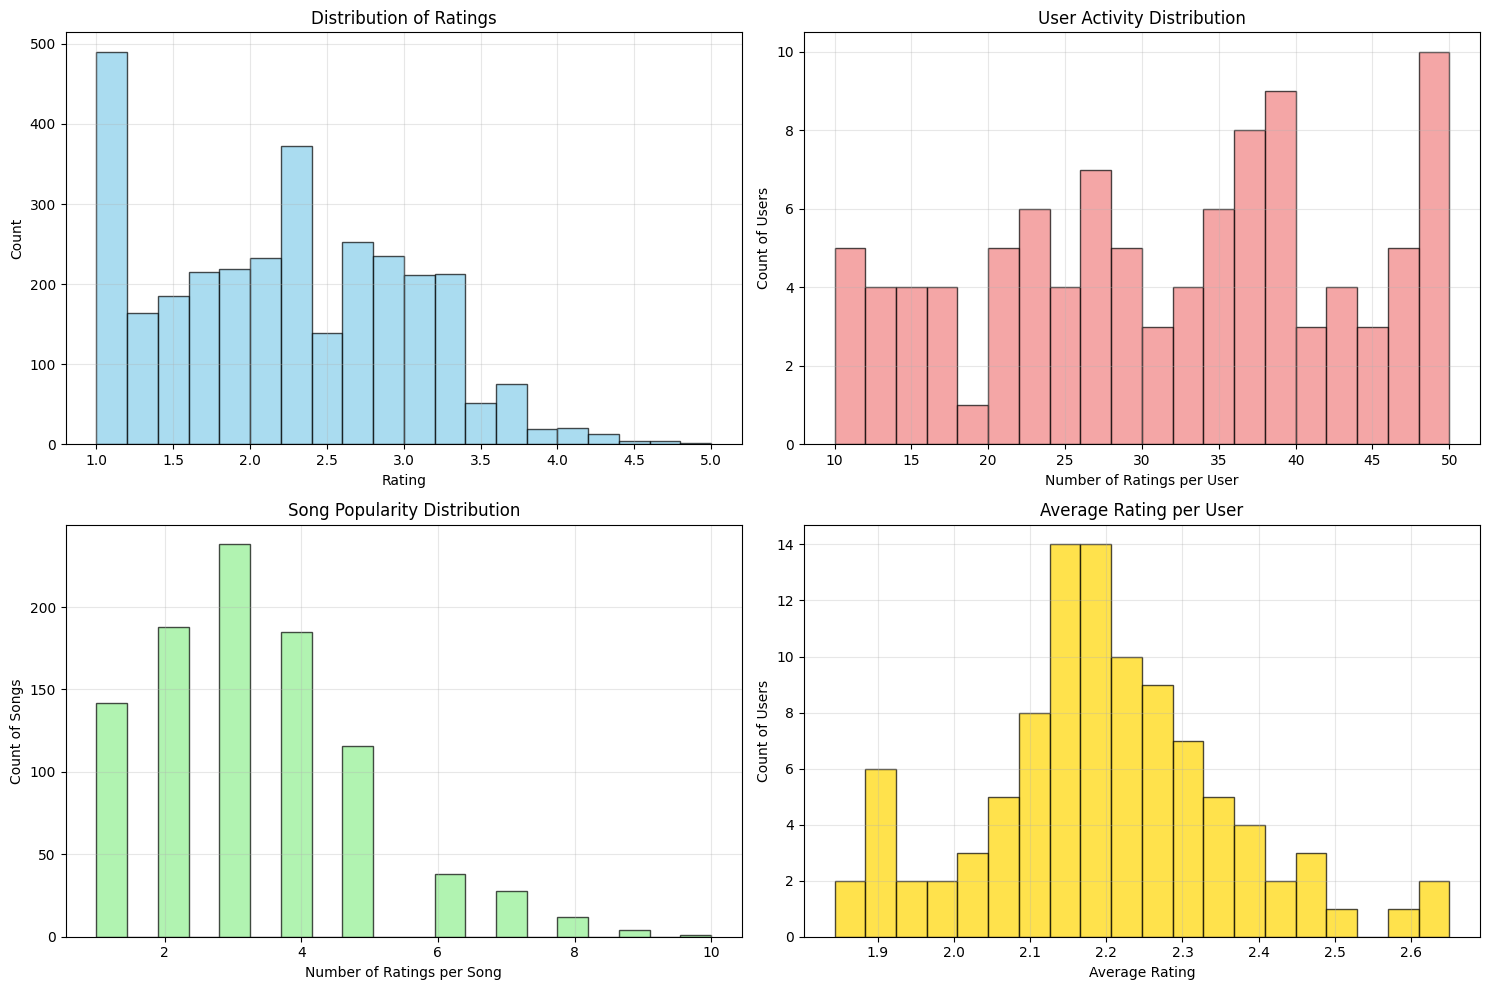


MODEL EVALUATION SUMMARY
Dataset Statistics:
- Total ratings: 3,118
- Unique users: 100
- Unique songs: 952
- Sparsity: 96.72%

Model Performance:
- Best Model: SVD
- RMSE: 0.751 ± 0.011
- MAE: 0.627 ± 0.009

Recommendation System Ready!
You can now get personalized music recommendations for any user in the system.


In [3]:
# ===============================
# SPOTIFY RECOMMENDATION SYSTEM
# ===============================

#Author:Landen Ramsey

#Install libraries
!pip install scikit-surprise pandas matplotlib --quiet
!pip uninstall numpy scikit-surprise -y
!pip install "numpy<2" scikit-surprise
#Import libraries
import pandas as pd
import numpy as np
import io
from google.colab import files
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, train_test_split
print("Import successful!")
from collections import defaultdict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Upload dataset.csv
print("Upload your CSV file (dataset.csv):")
uploaded = files.upload()

#Load CSV
filename = list(uploaded.keys())[0]  # grabs the uploaded file name
print(f"Loading file: {filename}")
music = pd.read_csv(io.BytesIO(uploaded[filename]))

print("First 5 rows of your dataset:")
display(music.head())
print(f"\nDataset shape: {music.shape}")
print("\nColumn names:")
print(music.columns.tolist())
print("\nDataset info:")
music.info()

#Data preparation and validation
print("\nDetecting data format...")

#Check if the dataset has the required columns for collaborative filtering
required_cols = ['userId', 'songId', 'rating']
available_cols = music.columns.tolist()

#Try to map common column names to required format
column_mapping = {}
for col in available_cols:
    col_lower = col.lower().strip()
    if 'user' in col_lower and 'id' in col_lower:
        column_mapping['userId'] = col
    elif 'song' in col_lower and 'id' in col_lower:
        column_mapping['songId'] = col
    elif 'track' in col_lower and 'id' in col_lower:
        column_mapping['songId'] = col
    elif 'rating' in col_lower or 'score' in col_lower:
        column_mapping['rating'] = col
    elif 'popularity' in col_lower:
        column_mapping['rating'] = col

print(f"Column mapping detected: {column_mapping}")

#If we don't have proper user-item-rating format, create synthetic data
if len(column_mapping) < 3:
    print("\nCreating synthetic user-item-rating data for demonstration...")

    #Create synthetic users and ratings based on song features
    np.random.seed(42)
    n_users = 100
    n_songs = min(len(music), 1000)  # Limit songs for performance

    #Sample songs
    music_sample = music.head(n_songs).copy()

    #Create user-song-rating combinations
    synthetic_data = []
    for user_id in range(1, n_users + 1):
        #Each user rates 10-50 random songs
        n_ratings = np.random.randint(10, 51)
        song_indices = np.random.choice(len(music_sample), size=n_ratings, replace=False)

        for idx in song_indices:
            #Generate rating based on song popularity or random
            if 'popularity' in music_sample.columns:
                base_rating = music_sample.iloc[idx]['popularity'] / 20  #Scale to 1-5
                rating = max(1, min(5, base_rating + np.random.normal(0, 0.5)))
            else:
                rating = np.random.randint(1, 6)  #Random rating 1-5

            synthetic_data.append({
                'userId': user_id,
                'songId': idx,
                'rating': round(rating, 1)
            })

    music_ratings = pd.DataFrame(synthetic_data)
    print(f"Created synthetic dataset with {len(music_ratings)} ratings")

else:
    #Use existing data with proper mapping
    music_ratings = music[[column_mapping['userId'], column_mapping['songId'], column_mapping['rating']]].copy()
    music_ratings.columns = ['userId', 'songId', 'rating']

    #Ensure ratings are in proper scale
    music_ratings['rating'] = pd.to_numeric(music_ratings['rating'], errors='coerce')
    music_ratings = music_ratings.dropna()

    #Scale ratings to 1-5 if needed
    if music_ratings['rating'].max() > 5:
        music_ratings['rating'] = (music_ratings['rating'] / music_ratings['rating'].max()) * 5

    print(f"Using existing data with {len(music_ratings)} ratings")

#Display final dataset info
print(f"\nFinal dataset shape: {music_ratings.shape}")
print(f"Unique users: {music_ratings['userId'].nunique()}")
print(f"Unique songs: {music_ratings['songId'].nunique()}")
print(f"Rating range: {music_ratings['rating'].min():.1f} - {music_ratings['rating'].max():.1f}")

#Step 6: Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(music_ratings[['userId', 'songId', 'rating']], reader)

#Step 7: Train collaborative filtering models
print("\n" + "="*50)
print("TRAINING RECOMMENDATION MODELS")
print("="*50)

#SVD (Matrix Factorization)
print("\n1. Training SVD (Matrix Factorization) model...")
svd_model = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02)
svd_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

#KNN (Item-based Collaborative Filtering)
print("\n2. Training KNN (Item-based) model...")
knn_model = KNNBasic(k=40, sim_options={'name': 'cosine', 'user_based': False})
knn_results = cross_validate(knn_model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

#Choose best model based on RMSE
if np.mean(svd_results['test_rmse']) < np.mean(knn_results['test_rmse']):
    best_model = svd_model
    model_name = "SVD"
    print(f"\nBest model: SVD (RMSE: {np.mean(svd_results['test_rmse']):.3f})")
else:
    best_model = knn_model
    model_name = "KNN"
    print(f"\nBest model: KNN (RMSE: {np.mean(knn_results['test_rmse']):.3f})")

#Fit model on full dataset
trainset = data.build_full_trainset()
best_model.fit(trainset)

#Generate recommendations
def get_top_n_recommendations(model, trainset, n=10):
    """Generate top-N recommendations for all users"""
    print(f"Generating top-{n} recommendations...")

    #Build anti-testset (all unrated items for each user)
    testset = trainset.build_anti_testset()
    predictions = model.test(testset)

    #group predictions by user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #Sort and get top N for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

#Generate recommendations
recommendations = get_top_n_recommendations(best_model, trainset, n=10)

#Interactive recommendation display
def display_recommendations(user_id, recommendations, music_data=None):
    """Display recommendations for a specific user"""
    if user_id not in recommendations:
        print(f"User {user_id} not found in the dataset.")
        return

    print(f"\nTop 10 recommendations for User {user_id} using {model_name}:")
    print("-" * 60)

    for i, (song_id, predicted_rating) in enumerate(recommendations[user_id], 1):
        print(f"{i:2d}. Song ID: {song_id:4d} | Predicted Rating: {predicted_rating:.2f}")

        #If original music data is available, show song details
        if music_data is not None and song_id < len(music_data):
            song_info = music_data.iloc[song_id]
            if 'track_name' in song_info:
                print(f"     Track: {song_info['track_name']}")
            if 'artist_name' in song_info:
                print(f"     Artist: {song_info['artist_name']}")
            print()

#Get user input and show recommendations
available_users = list(recommendations.keys())
print(f"\nAvailable users: {min(available_users)} - {max(available_users)}")
print(f"Total users in system: {len(available_users)}")

try:
    user_id = int(input("\nEnter a user ID to see recommendations: "))
    display_recommendations(user_id, recommendations, music if len(column_mapping) >= 3 else None)

except ValueError:
    print("Invalid input. Using default user ID: 1")
    display_recommendations(1, recommendations, music if len(column_mapping) >= 3 else None)

#Visualizations
print("\n" + "="*50)
print("DATA ANALYSIS AND VISUALIZATIONS")
print("="*50)

#Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#1. Rating distribution
axes[0, 0].hist(music_ratings['rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Ratings')
axes[0, 0].grid(True, alpha=0.3)

#2. Number of ratings per user
user_counts = music_ratings['userId'].value_counts()
axes[0, 1].hist(user_counts, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Number of Ratings per User')
axes[0, 1].set_ylabel('Count of Users')
axes[0, 1].set_title('User Activity Distribution')
axes[0, 1].grid(True, alpha=0.3)

#3. Number of ratings per song
song_counts = music_ratings['songId'].value_counts()
axes[1, 0].hist(song_counts, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Number of Ratings per Song')
axes[1, 0].set_ylabel('Count of Songs')
axes[1, 0].set_title('Song Popularity Distribution')
axes[1, 0].grid(True, alpha=0.3)

#4. Average rating per user
user_avg_ratings = music_ratings.groupby('userId')['rating'].mean()
axes[1, 1].hist(user_avg_ratings, bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count of Users')
axes[1, 1].set_title('Average Rating per User')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Model evaluation summary
print("\n" + "="*50)
print("MODEL EVALUATION SUMMARY")
print("="*50)

print(f"Dataset Statistics:")
print(f"- Total ratings: {len(music_ratings):,}")
print(f"- Unique users: {music_ratings['userId'].nunique():,}")
print(f"- Unique songs: {music_ratings['songId'].nunique():,}")
print(f"- Sparsity: {(1 - len(music_ratings) / (music_ratings['userId'].nunique() * music_ratings['songId'].nunique())) * 100:.2f}%")

print(f"\nModel Performance:")
print(f"- Best Model: {model_name}")
if model_name == "SVD":
    print(f"- RMSE: {np.mean(svd_results['test_rmse']):.3f} ± {np.std(svd_results['test_rmse']):.3f}")
    print(f"- MAE: {np.mean(svd_results['test_mae']):.3f} ± {np.std(svd_results['test_mae']):.3f}")
else:
    print(f"- RMSE: {np.mean(knn_results['test_rmse']):.3f} ± {np.std(knn_results['test_rmse']):.3f}")
    print(f"- MAE: {np.mean(knn_results['test_mae']):.3f} ± {np.std(knn_results['test_mae']):.3f}")

print(f"\nRecommendation System Ready!")
print(f"You can now get personalized music recommendations for any user in the system.")